# Course Project - IMDB moving rating

## 1 Import Packages

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt



import os
for dirname, _, filenames in os.walk('C:\\USERS\\MI-PC\\Desktop\\HKUST\\MFIT5010\\IMDB'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\USERS\MI-PC\Desktop\HKUST\MFIT5010\IMDB\IMDB Dataset.csv
C:\USERS\MI-PC\Desktop\HKUST\MFIT5010\IMDB\test.csv
C:\USERS\MI-PC\Desktop\HKUST\MFIT5010\IMDB\train.csv


In [2]:
from os import path
from pandas import DataFrame
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
import re

In [3]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package vader_lexicon to C:\Users\MI-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\MI-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\MI-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import matplotlib.colors

In [5]:
import wordcloud   # Sentiment-based Word Clouds
from wordcloud import WordCloud, STOPWORDS 
from PIL import Image

In [6]:
os.chdir("C:\\USERS\\MI-PC\\Desktop\\HKUST\\MFIT5010\\IMDB")
os.getcwd()

'C:\\USERS\\MI-PC\\Desktop\\HKUST\\MFIT5010\\IMDB'

In [7]:
df=pd.read_csv('C:/Users/MI-PC/Desktop/HKUST/MFIT5010/IMDB/IMDB Dataset.csv',header=0,error_bad_lines=True,encoding='utf8')
df.dtypes

review       object
sentiment    object
dtype: object

In [8]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### 2.1 WordCloud

In [9]:
specific_wc = ['br', 'movie', 'film']
sw = list(set(stopwords.words('english')))
sw = sw + specific_wc

print(sw[:5])
print(len(sw))

['my', 'yours', 'while', 'ours', 'didn']
182


In [10]:
sentences = []
labels = []

for ind, row in df.iterrows():
    labels.append(row['sentiment'])
    sentence = row['review']
    for word in sw:
        token = " "+word+" "
        sentence = sentence.replace(token, " ")
        sentence = sentence.replace(" ", " ")
    sentences.append(sentence)

#### Word Cloud on All Reviews

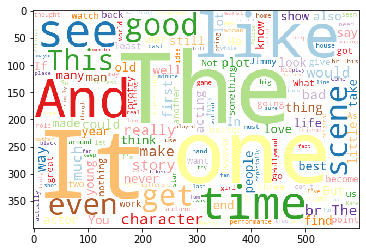

In [11]:
wc = WordCloud(width = 600, height = 400, 
                    background_color ='white', 
                    stopwords = sw, 
                    min_font_size = 10, colormap='Paired_r').generate(' '.join(sentences[:100]))
plt.imshow(wc)

#### Word Cloud on Positive Reviews

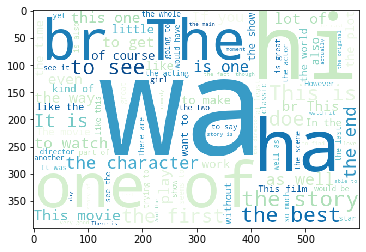

In [12]:
pos_rev = ' '.join(df[df['sentiment']=='positive']['review'].to_list()[:10000])
wc = WordCloud(width = 600, height = 400, 
                    background_color ='white', 
                    stopwords = sw, 
                    min_font_size = 10, colormap='GnBu').generate(pos_rev)
plt.imshow(wc)

#### Word Cloud on Negative Reviews

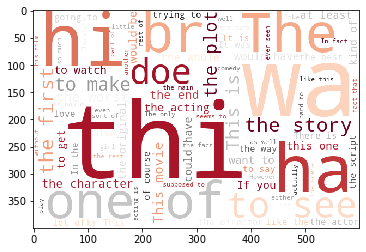

In [13]:
pos_rev = ' '.join(df[df['sentiment']=='negative']['review'].to_list()[:10000])
wc = WordCloud(width = 600, height = 400, 
                    background_color ='white', 
                    stopwords = sw, 
                    min_font_size = 10, colormap='RdGy').generate(pos_rev)
plt.imshow(wc)

## 3 Sentimental Analysis
### 3.1 SentScore 
#### Run sentimental analysis on "Review" and return compound value

In [14]:
def sc(x):
    score=SentimentIntensityAnalyzer().polarity_scores(x)
    return score['compound']

#### Create a new column "SentScore" to store the compound score of the sentimental analysis above 

In [15]:
df["SentScore"]=df["review"].map(sc)

In [16]:
df.head()

,review,sentiment,SentScore
0,One of the other reviewers has mentioned that ...,positive,-0.9951
1,A wonderful little production. <br /><br />The...,positive,0.9641
2,I thought this was a wonderful way to spend ti...,positive,0.9605
3,Basically there's a family where a little boy ...,negative,-0.9213
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,0.9744


### 3.2 SentClass
#### Run sentimental analysis on "Review" and return compound value

In [17]:
def sca(lb):
    if lb >= .6:
        return "Very Good"
    elif (lb > .2) and (lb < .6):
        return "Good"
    elif (lb > -.2) and (lb < .2):
        return "Average"
    elif (lb > -.6) and (lb < -.2):
        return "Disappointing"
     
    else:
        return "Regrettable"

#### Create a new column "SentClass" to to indicate the class of the review

In [18]:
df["SentClass"]=df["SentScore"].map(sca)

In [19]:
df.head(15)

,review,sentiment,SentScore,SentClass
0,One of the other reviewers has mentioned that ...,positive,-0.9951,Regrettable
1,A wonderful little production. <br /><br />The...,positive,0.9641,Very Good
2,I thought this was a wonderful way to spend ti...,positive,0.9605,Very Good
3,Basically there's a family where a little boy ...,negative,-0.9213,Regrettable
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,0.9744,Very Good
5,"Probably my all-time favorite movie, a story o...",positive,0.9828,Very Good
6,I sure would like to see a resurrection of a u...,positive,0.9022,Very Good
7,"This show was an amazing, fresh & innovative i...",negative,0.8596,Very Good
8,Encouraged by the positive comments about this...,negative,0.2362,Good
9,If you like original gut wrenching laughter yo...,positive,0.9149,Very Good


### 3.3 Sentiment_bin
#### Define a function for "sentiment" column, postive = 1 and nagative = 0

In [20]:
def num(lb):
    if lb == 'positive':
        return 1   
    else:
        return 0

#### Create a new column "sentiment_bin" to apply the function above

In [21]:
df["sentiment_bin"]=df["sentiment"].map(num)

In [22]:
df.head(15)

,review,sentiment,SentScore,SentClass,sentiment_bin
0,One of the other reviewers has mentioned that ...,positive,-0.9951,Regrettable,1
1,A wonderful little production. <br /><br />The...,positive,0.9641,Very Good,1
2,I thought this was a wonderful way to spend ti...,positive,0.9605,Very Good,1
3,Basically there's a family where a little boy ...,negative,-0.9213,Regrettable,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,0.9744,Very Good,1
5,"Probably my all-time favorite movie, a story o...",positive,0.9828,Very Good,1
6,I sure would like to see a resurrection of a u...,positive,0.9022,Very Good,1
7,"This show was an amazing, fresh & innovative i...",negative,0.8596,Very Good,0
8,Encouraged by the positive comments about this...,negative,0.2362,Good,0
9,If you like original gut wrenching laughter yo...,positive,0.9149,Very Good,1


### 3.4 SentScore_bin
#### Apply a similar function for "SentScore" column, postive = 1 and nagative = 0

In [23]:
def numscore(lb):
    if lb >= 0:
        return 1     
    else:
        return 0

#### Create a new column "SentScore_bin" to apply the function above

In [24]:
df["SentScore_bin"]=df["SentScore"].map(numscore)

In [25]:
df.head(15)

,review,sentiment,SentScore,SentClass,sentiment_bin,SentScore_bin
0,One of the other reviewers has mentioned that ...,positive,-0.9951,Regrettable,1,0
1,A wonderful little production. <br /><br />The...,positive,0.9641,Very Good,1,1
2,I thought this was a wonderful way to spend ti...,positive,0.9605,Very Good,1,1
3,Basically there's a family where a little boy ...,negative,-0.9213,Regrettable,0,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,0.9744,Very Good,1,1
5,"Probably my all-time favorite movie, a story o...",positive,0.9828,Very Good,1,1
6,I sure would like to see a resurrection of a u...,positive,0.9022,Very Good,1,1
7,"This show was an amazing, fresh & innovative i...",negative,0.8596,Very Good,0,1
8,Encouraged by the positive comments about this...,negative,0.2362,Good,0,1
9,If you like original gut wrenching laughter yo...,positive,0.9149,Very Good,1,1


### 4 Text Adjustment and Cleaning

#### a. Make Text Lower Case

In [26]:
df["review"]  = df["review"].str.lower()

#### b. Remove digits from text

In [27]:
def Remove_digit(text):
    result = re.sub(r"\d", "", text)
    return result

#### c. Remove HTML from text

In [28]:
def remove_html(text):
    result = re.sub(r'<.*?>','',text) 
    return result

#### d. Remove special text characters

In [29]:
def remove_spl(text):
    result = re.sub(r'\W',' ',text) 
    return result

#### e.  Link words with similar meaning as one word

In [30]:
def lem_word(text):
    result= WordNetLemmatizer().lemmatize(text)
    return result

#### Apply all functions above to column "review"

In [31]:
df["review"]  = df["review"].apply(Remove_digit)
df["review"]  = df["review"].apply(remove_html)
df["review"]  = df["review"].apply(remove_spl)
df["review"]  = df["review"].apply(lem_word)

In [32]:
df.head()

,review,sentiment,SentScore,SentClass,sentiment_bin,SentScore_bin
0,one of the other reviewers has mentioned that ...,positive,-0.9951,Regrettable,1,0
1,a wonderful little production the filming tec...,positive,0.9641,Very Good,1,1
2,i thought this was a wonderful way to spend ti...,positive,0.9605,Very Good,1,1
3,basically there s a family where a little boy ...,negative,-0.9213,Regrettable,0,0
4,petter mattei s love in the time of money is...,positive,0.9744,Very Good,1,1


#### Store the adjusted text to object 'corpus1' and transform into a list

In [33]:
corpus1=df['review'].tolist()

#### Create an object 'corpus' which includes the first 1000 values of 'corpus1'

In [34]:
corpus=corpus1[ :1000]

### 4.2 Vectorisation
#### Denfine N-gram range to be Unigrams (n-gram size = 1) and Bigrams (terms compounded by 2 words)

In [35]:
from sklearn.feature_extraction import text

cv = text.CountVectorizer(input=corpus,ngram_range=(1,2),stop_words='english')
matrix = cv.fit_transform(corpus)

corpus2 = pd.DataFrame(matrix.toarray(), columns=cv.get_feature_names())

In [36]:
corpus2.head()

,_fargo_,_fargo_ just,_inspire_,_inspire_ audience,aaargh,aaargh wes,aaliyah,aaliyah soul,aamir,aamir khan,...,zulu,zulu simply,zwick,zwick shame,zzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzz imdb,élan,élan unique,ísnt,ísnt entertaining
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Dimension of Data

There are 1000 rows which are consistent with the selected amount of rows of the list "corpus", and there are 110012 colums are humangous which indicated a giant matrix have been created.

In [37]:
corpus2.shape

(1000, 110012)

### 5 Term Frequency and Inverse Document Frequency
#### Remove the English stop_words

In [38]:
tf = text.TfidfVectorizer(input=corpus, ngram_range=(1,2),stop_words='english')

matrix1 = tf.fit_transform(corpus)

X = pd.DataFrame(matrix1.toarray(), columns=tf.get_feature_names())

In [39]:
X.head()

,_fargo_,_fargo_ just,_inspire_,_inspire_ audience,aaargh,aaargh wes,aaliyah,aaliyah soul,aamir,aamir khan,...,zulu,zulu simply,zwick,zwick shame,zzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzz imdb,élan,élan unique,ísnt,ísnt entertaining
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Set y to be the first 1000 values of column "SentScore_bin"

In [40]:
y = df['SentScore_bin'][:1000].values

In [41]:
print(y)

[0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0
 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0
 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1
 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1
 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1
 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1
 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1
 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1
 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0
 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0
 0 1 1 1 0 0 1 0 0 1 1 1 

### 6 Run Multiple models on 'SentScore_bin' as "y"
#### Split X and y in train and test data. Run Random Forest Classifier on X = Vectorized Matrix and y = SentScore_bin.

#### 6.1 RandomForest Classifier

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=23)

#### Set the Random Forest Classifier and parameters. Fit the model on X and y train data.

In [43]:
from sklearn.ensemble import RandomForestClassifier
text_classifier=RandomForestClassifier(bootstrap=False, criterion="gini", max_features=0.3, min_samples_leaf=4, min_samples_split=9, n_estimators=100)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=0.3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Run the prediction on X test data and store in the object 'predictions'

In [44]:
predictions = text_classifier.predict(X_test)

#### Accuracy Score

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print(accuracy_score(y_test, predictions))

[[ 34  42]
 [ 22 102]]
              precision    recall  f1-score   support

           0       0.61      0.45      0.52        76
           1       0.71      0.82      0.76       124

    accuracy                           0.68       200
   macro avg       0.66      0.63      0.64       200
weighted avg       0.67      0.68      0.67       200

0.68


#### 6.2 Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

#### Train the model and Fitting the model for TFIDF Features

In [47]:
lr=LogisticRegression(C=1.0,class_weight=None,dual=False,fit_intercept=True,intercept_scaling=1,l1_ratio=None,max_iter=100,
multi_class='auto',n_jobs=None,penalty='l2',random_state=23,solver='lbfgs',tol=0.0001,verbose=0,warm_start=False)

lr_tfidf=lr.fit(X_train,y_train)
print(lr_tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=23, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


#### Predicting the model for TFIDF Features

In [48]:
lr_tfidf_predict=lr.predict(X_test)
print(lr_tfidf_predict)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


#### Accuracy score

In [49]:
lr_tfidf_score=accuracy_score(y_test,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_tfidf_score : 0.62


#### Classification Report for TFIDF Features

In [50]:
lr_tfidf_report=classification_report(y_test,lr_tfidf_predict,target_names=['0','1'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        76
           1       0.62      1.00      0.77       124

    accuracy                           0.62       200
   macro avg       0.31      0.50      0.38       200
weighted avg       0.38      0.62      0.47       200



C:\Users\MI-PC\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 6.3 GRADIENT BOOSTING CLASSIFIER

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
clf=GradientBoostingClassifier(n_estimators=80,random_state=23)

In [47]:
clf.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=80,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=23, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [48]:
clf.score(X_test,y_test)

0.725

In [49]:
from sklearn.model_selection import GridSearchCV
mod=GridSearchCV(clf,param_grid={'n_estimators': [80,100,120,140,160]})

In [50]:
mod.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=80,
                                                  n_iter_no_change=None,
       

In [51]:
mod.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=80,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=23, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [52]:
clf=GradientBoostingClassifier(n_estimators=100,random_state=23)
clf.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=23, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [53]:
clf.score(X_test,y_test)

0.715

In [54]:
clf.feature_importances_

array([0., 0., 0., ..., 0., 0., 0.])

In [55]:
feature_imp=pd.Series(clf.feature_importances_)
feature_imp.sort_values(ascending=False)

6343      0.067244
41101     0.061226
108616    0.056553
8108      0.043326
65082     0.035758
            ...   
73273     0.000000
73274     0.000000
73275     0.000000
73276     0.000000
0         0.000000
Length: 110012, dtype: float64

### 7 Run Multiple models on 'sentiment_bin' as "y"
#### Repeat as above, but set the first 1000 values of column 'sentiment_bin' as "y"

In [67]:
y = df['sentiment_bin'][:1000].values

#### Split the data in train and test data

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=23)

#### 7.1 Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
text_classifier=RandomForestClassifier(bootstrap=False, criterion="gini", max_features=0.3, min_samples_leaf=4, min_samples_split=9, n_estimators=100)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=0.3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
predictions = text_classifier.predict(X_test)

#### Accuracy Score

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print(accuracy_score(y_test, predictions))

[[76 27]
 [18 79]]
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       103
           1       0.75      0.81      0.78        97

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.77       200
weighted avg       0.78      0.78      0.77       200

0.775


#### 7.2 Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
#training the model
lr=LogisticRegression(C=1.0,class_weight=None,dual=False,fit_intercept=True,intercept_scaling=1,l1_ratio=None,max_iter=100,
multi_class='auto',n_jobs=None,penalty='l2',random_state=23,solver='lbfgs',tol=0.0001,verbose=0,warm_start=False)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(X_train,y_train)
print(lr_tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=23, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


#### Predicting the model for TFIDF Features

In [63]:
lr_tfidf_predict=lr.predict(X_test)
print(lr_tfidf_predict)

[0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1
 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0
 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0
 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1
 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0
 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0]


#### Accuracy Score

In [64]:
lr_tfidf_score=accuracy_score(y_test,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_tfidf_score : 0.805


#### Classification report for TFIDF Features

In [65]:
lr_tfidf_report=classification_report(y_test,lr_tfidf_predict,target_names=['0','1'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

           0       0.87      0.73      0.79       103
           1       0.75      0.89      0.82        97

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.82      0.81      0.80       200



#### 7.3 Gradient Boosting Classifier

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(n_estimators=80,random_state=23)
clf.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=80,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=23, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [70]:
clf.score(X_test,y_test)

0.77

In [72]:
from sklearn.model_selection import GridSearchCV
mod=GridSearchCV(clf,param_grid={'n_estimators': [80,100]})

In [73]:
mod.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=80,
                                                  n_iter_no_change=None,
       

In [74]:
mod.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=23, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [76]:
clf=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=23, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
clf.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=23, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [77]:
clf.score(X_test,y_test)

0.765